## Can A.I. save Jack from the Titanic?

**Want to read the frienly article based on this code** (with pictures!):
https://github.com/antoinedme/titanic-dataset-ml


Author: *Antoine de Marassé* https://www.linkedin.com/in/hiantoine/

Based on: Microsoft Azure (data science masterclass), Kaggle, Pandas, Sci-kit Learn and Seaborn


This notebook is a simple example where I incorporate both historical and fictionalized aspects from the 1997 epic romance and disaster movie directed by James Cameron, starring Leonardo DiCaprio and Kate Winslet. The RMS Titanic dataset is quite popular online and is a typical dataset used to make 'computer' understand patterns: Machine Learning. 

Code Contents:
- [Exploring the Passengers dataset entries](#Exploring-the-Passengers-dataset-entries)
- [Checking and preparing the data](#Checking-and-preparing-the-data)
- [Visual analysis with Seaborn](#Visual-Analysis-with-Seaborn)
- [Split the dataset (training and testing)](#Split-the-training-and-test-data)
- [Apply logistic regression](#Applying-Logistic-Regression)
- [Evaluate the model](#Evaluate-the-model)
- [What about Jack and Rose](#What-about-Jack-and-Rose?)
- [Apply decision tree](#One-more-turn-applying-Decision-Tree)




## RMS Titanic story

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. 
    
After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland, before heading west to New York. On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she hit an iceberg at 11:40 p.m. ship's time. The collision caused the hull plates to buckle inwards along her starboard (right) side and opened five of her sixteen watertight compartments to the sea; she could only survive four flooding. Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats. At 2:20 a.m., she broke apart and foundered with well over one thousand people still aboard. Just under two hours after Titanic sank, the Cunard liner RMS Carpathia arrived and brought aboard an estimated 705 survivors. 


<img style="" src="https://raw.githubusercontent.com/antoinedme/titanic-dataset-ml/master/img/opening-image.png"> 

## Exploring the Passengers dataset entries

Install pandas package ```conda install pandas```

In [1]:
# Import classic numpy library, and pandas, open source data analysis and manipulation tool
import pandas as pd
import numpy as np

In [2]:
# Load the dataset file into "titanic" object
titanic = pd.read_csv("data/titanic-1309-rows-biostatvanderbilt.csv")
# Let's have a look at the dataset attributes
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Let's check the dataset info, variables types and null counts 
# (pclass, survived, name, sex, sibsp, parch, ticket are complete)
# (embarked miss one value, age is incomplete for 263 passengers)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
# Let's get few statistical data from the dataset (and mostly the mean of survivers: 38,19%)
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
# We want, for informative purpose, to understand a bit the mean value for each parameter grouped by survived 0/1.
# We use the 'groupby' function to split the data into groups based the 'survived' criteria. Results are:
# Survived group: mean class 1,96 (between first and second class), average fare paid: 49.36$
# Died group: mean class 2,50 (between second and third class), average fare paid: 23.35$
titanic.groupby('survived').mean()

,pclass,age,sibsp,parch,fare,body
survived,,,,,,
0,2.500618,30.545363,0.521632,0.328801,23.353831,160.809917
1,1.962000,28.918244,0.462000,0.476000,49.361184,NaN


### So, what did we understood from the dataset exploration?

The dataset has 1309 entries. 
This dataset describes the survival status of individual passengers on the Titanic. The dataset has 10 variables:
- `survived`: 0 = No, 1 = Yes. **(As we can see on the table above `survived` mean, 38,19% of passengers survived)**
- `pclass`: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- Demographics: `Sex`, `Age`
- `sibsp`, `parch`: Number of siblings or spouses aboard, number of parents or children aboard
- `ticket`: Passenger ticket number
- `fare`: Passenger fare
- `cabin`: Cabin number
- `embarked`: Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

## Checking and preparing the data

Dropping few columns and checking data values

In [6]:
# Removing some variables that might be not used (to be checked later) and anonymizing the data
titanic.drop(['name','body','boat','cabin','ticket','embarked','home.dest'],axis=1,inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [7]:
# As we can see, the age column has quite few missing values, let's count how many:
titanic['age'].isnull().value_counts()

False    1046
True      263
Name: age, dtype: int64

In [8]:
# Let's fill this 'age' parameter with the median value for each gender type
titanic['age'] = titanic.groupby('sex')['age'].apply(lambda x: x.fillna(x.median()))

In [9]:
# Now we will plot the median price (fare) paid for each class (results: first class costs 60, while third only 8)
titanic.groupby('pclass')['fare'].median()

pclass
1    60.0000
2    15.0458
3     8.0500
Name: fare, dtype: float64

In [10]:
# Let's fill this 'fare' parameter with the exact same technique as below, but using median value for each class
titanic['fare'] = titanic.groupby('pclass')['fare'].apply(lambda x: x.fillna(x.median()))

In [11]:
# We check again the dataframe (results: you can see all 1309 values count for each parameter, that's complete)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [12]:
# Let's also just duplicate our table for later, we will call it "iceberg"
iceberg = titanic

## Visual Analysis with Seaborn

Install Seaborn, statistical data visualization library based on matplotlib: ```conda install seaborn```

In this section, we will plot just a bit of information that we already got from exploring the data, and also use Seaborn to plot parameter's correlation (In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data.)

In [13]:
# Duplicating the object for some cleaning and analysis
exploratory = titanic
exploratory.drop('sibsp',axis=1,inplace=True)

In [14]:
# We want to convert the values of the gender parameter ("female" and "male" strings) to a 0/1 integers
exploratory['ismale'] = exploratory['sex'].replace(regex='female', value=0)
exploratory['sex_is_male'] = exploratory['ismale'].replace(regex='male', value=1)
exploratory.drop(['sex','ismale'],axis=1,inplace=True)
# We just re-order the columns
exploratory = exploratory[['sex_is_male','age','parch','fare','pclass','survived']]
# And print the columns firts rows
exploratory.head()

,sex_is_male,age,parch,fare,pclass,survived
0,0,29.00,0,211.3375,1,1
1,1,0.92,2,151.5500,1,1
2,0,2.00,2,151.5500,1,0
3,1,30.00,2,151.5500,1,0
4,0,25.00,2,151.5500,1,0


In [15]:
# Now, we might want to check the survival rate for each class (first, second and third) divided by gender
exploratory.groupby(['sex_is_male','pclass'])['survived'].mean()

sex_is_male  pclass
0            1         0.965278
             2         0.886792
             3         0.490741
1            1         0.340782
             2         0.146199
             3         0.152130
Name: survived, dtype: float64

Survival probability: for women on 1st class is: 96,5% compared to men only 34,1%
When we look at the 3rd class, the probability drops to 49,1% for women and 15,2% for men. We might want to plot those stats.

In [17]:
# Import the python data visualization library based on matplotlib
import seaborn as sns

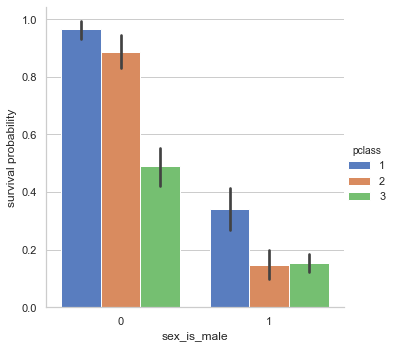

In [18]:
# Setting a bit the styling of our plots
sns.set(style="whitegrid")

# We now want to draw a nested barplot to show survival for class and sex, basically describing the data explored just above
graph = sns.catplot(x="sex_is_male", y="survived", hue="pclass", kind="bar", palette="muted", data=exploratory)
graph.set_ylabels("survival probability")

In [19]:
# We will now check for correlation, or dependence is any statistical relationship, between the variables 
# This helps us understand if we can get rid of few columns and to understand the most important factors
exploratory.corr()

,sex_is_male,age,parch,fare,pclass,survived
sex_is_male,1.000000,0.059834,-0.213125,-0.185744,0.124617,-0.528693
age,0.059834,1.000000,-0.126307,0.178494,-0.379761,-0.045882
parch,-0.213125,-0.126307,1.000000,0.221668,0.018322,0.082660
fare,-0.185744,0.178494,0.221668,1.000000,-0.558740,0.244479
pclass,0.124617,-0.379761,0.018322,-0.558740,1.000000,-0.312469
survived,-0.528693,-0.045882,0.082660,0.244479,-0.312469,1.000000


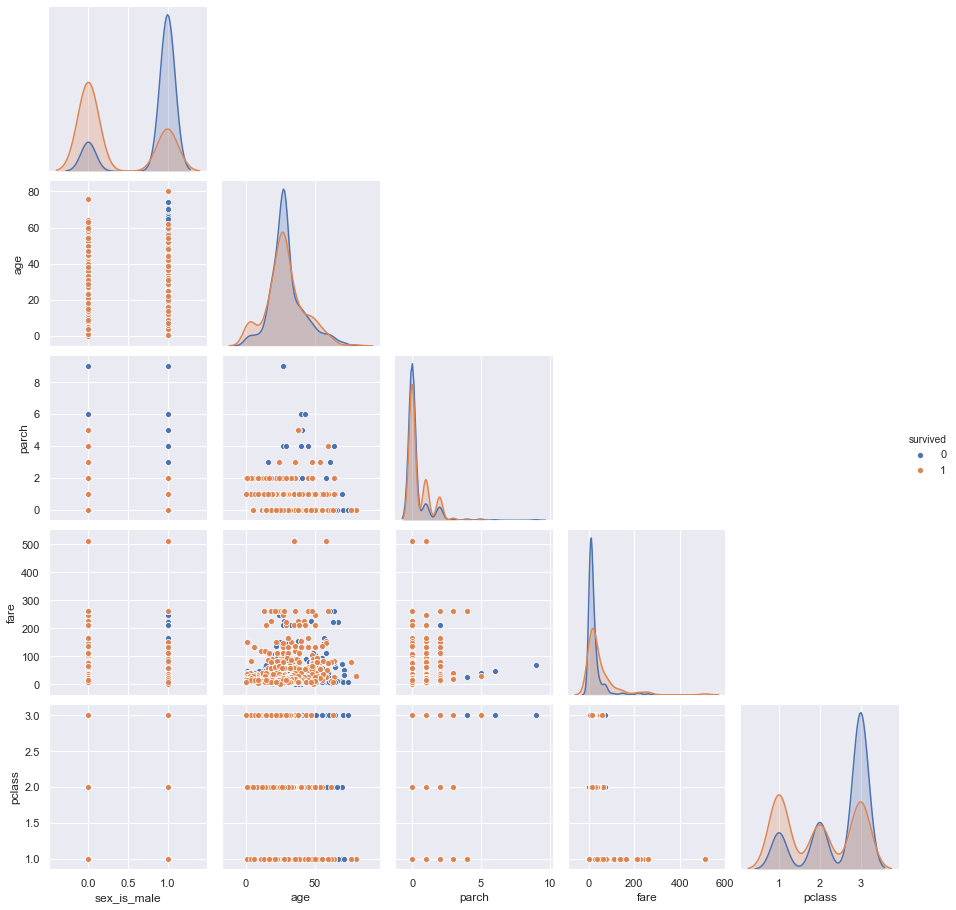

In [20]:
# Draw scatterplots for joint relationships and histograms for univariate distributions:
# different levels of a categorical variable by the color of plot elements
sns.set(style="darkgrid")  
sns.pairplot(exploratory, dropna=True, hue="survived", corner=True)

## Split the training and test data

Install the scikit-learn - Machine Learning in Python: ```conda install -c intel scikit-learn```
- Simple and efficient tools for predictive data analysis
- Built on NumPy, SciPy, and matplotlib
Link: https://scikit-learn.org/stable/
 
#### Predicting a continuous-valued attribute associated with an object.
For this part, I will first start to I will apply the linear regression model used on the scikit-learn `diabetes` dataset, in order to illustrate a two-dimensional plot of this regression technique.
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. The coefficients, the residual sum of squares and the coefficient of determination are also calculated.

In [21]:
# We import the tools to split arrays or matrices into random train and test subsets from Scikit 
from sklearn.model_selection import train_test_split

In [22]:
# We just use a bit of magic function here for display. With this backend, the output of plotting commands is displayed inline
%matplotlib inline

In [23]:
# Wait what was my dataset again? Let's just check if it's complete
iceberg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   age          1309 non-null   float64
 3   parch        1309 non-null   int64  
 4   fare         1309 non-null   float64
 5   sex_is_male  1309 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


In [24]:
# We first prepare our dataset into two variables X and y.
# The X variable is the whole dataframe without the survived parameter. 
# That means all passengers variables are there, without knowing if they died or survived the tragedy. 
X = iceberg.drop(['survived'],axis=1)

# The y is the target survived 0/1 we wan't to know.
y = iceberg['survived']

# We have a look at the generated results: (X should not have any 'survived' col left, and y should this isolated col)
X.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   age          1309 non-null   float64
 2   parch        1309 non-null   int64  
 3   fare         1309 non-null   float64
 4   sex_is_male  1309 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 51.3 KB


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [25]:
# We now use the train_test_split function from scikit learn to split the data into training/testing sets
# We chose a test size of 30% of total 1309 entries thus it cutted our set of training/testing to 916/393
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=67)

In [27]:
# Lets have a look at the training dataset:
print('Size of parameters table followed by info: ', X_train.shape)
X_train.info()
print('Size of survival rate followed by info: ', y_train.shape)
y_train

Size of parameters table followed by info:  (916, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 527 to 835
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       916 non-null    int64  
 1   age          916 non-null    float64
 2   parch        916 non-null    int64  
 3   fare         916 non-null    float64
 4   sex_is_male  916 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 42.9 KB
Size of survival rate followed by info:  (916,)


527     0
1280    0
170     1
491     0
587     1
       ..
905     1
985     1
7       0
821     0
835     0
Name: survived, Length: 916, dtype: int64

In [28]:
# Lets have a look at the testing dataset: 
print('Size of parameters table followed by info: ', X_test.shape)
X_test.info()
print('Size of survival rate followed by info: ', y_test.shape)
y_test

Size of parameters table followed by info:  (393, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 920 to 165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       393 non-null    int64  
 1   age          393 non-null    float64
 2   parch        393 non-null    int64  
 3   fare         393 non-null    float64
 4   sex_is_male  393 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 18.4 KB
Size of survival rate followed by info:  (393,)


920     0
540     1
1207    0
1098    0
951     0
       ..
390     0
1139    0
1000    1
549     1
165     1
Name: survived, Length: 393, dtype: int64

## Applying Logistic Regression


Logistic regression can be seen as a special case of the generalized linear model and thus analogous to linear regression. The model of logistic regression, however, is based on quite different assumptions (about the relationship between the dependent and independent variables) from those of linear regression. It's a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

Logistic regression measures the relationship between the categorical dependent variable (`survived`) and one or more independent variables (`age`, `sex`, `pclass` ...) by estimating probabilities using a logistic function, which is the cumulative distribution function of logistic distribution.

In [29]:
# We import the LogisticRegression model from sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [30]:
# Create logistic regression object classifier
lr = LogisticRegression()

In [31]:
# Fit the model with the training data (X is the parameters table, y is the results survived)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now the model is implemented and trained, we can now use the testing variables to predict the survival output.

In [32]:
# Predict result values using the linear model on the testing parameters table
predictions = lr.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

The `predictions` variable is an array for the 393 samples from the testing parameters dataset. We will now need to evaluate those results.

## Evaluate the model

In contrast to linear regression, logistic regression does not produce an $R^2$ score by which we can assess the accuracy of our model. In order to evaluate that, we will use a classification report, a confusion matrix, and the accuracy score.

In [33]:
# Scikit Learn has some ready tools to evaluate the models:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
# We will also plot a bit our results using pyplot (another library based on matplotlib)
import matplotlib.pyplot as plt

In [35]:
# Build a text report showing the main classification metrics. We use the 'survived' values and the predicted values
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       235
           1       0.71      0.67      0.69       158

    accuracy                           0.76       393
   macro avg       0.75      0.74      0.75       393
weighted avg       0.76      0.76      0.76       393



In [37]:
# Compute confusion matrix to evaluate the accuracy of a classification.
# It contains information about the actual and prediction classifications done by the classifier.
pd.DataFrame(confusion_matrix(y_test, predictions), 
             columns=['true survived', 'true not survived'], 
             index=['predicted survived', 'predicted not survived'])

,true survived,true not survived
predicted survived,192,43
predicted not survived,52,106


In [38]:
# Even though we printed the complete classification report, I want to isolate the simple accuracy score:
print(accuracy_score(y_test,predictions))

0.7582697201017812


## What about Jack and Rose?

In 1912 Southampton, 17-year-old first-class passenger Rose DeWitt Bukater, her fiancé Cal Hockley, and her mother Ruth board the luxurious Titanic. Ruth emphasizes that Rose's marriage will resolve their family's financial problems and allow them to retain their upper-class status. Distraught over the engagement, Rose climbs over the stern and contemplates suicide; Jack Dawson, a penniless artist, intervenes and discourages her. Discovered with Jack, Rose tells a concerned Cal that she was peering over the edge and Jack saved her from falling. Jack and Rose develop a tentative friendship, despite Cal and Ruth being wary of him. Following dinner, Rose secretly joins Jack at a party in third class.

Let's create the data for our lovely couple (we will follow the structure: class, age, parents on board, fare, sex): Jack is on third class, around 27 years old, alone on board, only paid 8 and is a male `jack = [3, 27, 0, 8, 1]`, and rose is on first class, around 22 years old, with family and paid 60 `rose = [1, 22, 1, 60, 0]`.

In [41]:
# Creating Jack and Rose from the movie
jack = [3, 27, 0, 8,  1]
rose = [1, 22, 1, 60, 0]
people = pd.DataFrame(np.array([jack, rose]), columns=['pclass', 'age', 'parch', 'fare','sex_is_male'])

In [42]:
# Run the prediction from the logisticregression classifier
will_they_live = lr.predict(people)

In [54]:
print("(Logistic Regression) Results for Jack:")
if will_they_live[0] == 0 : print("Jack just died again!")
else: print("Awesome, Jack did swim and survived!")             
print("(Logistic Regression) Results for Rose:")
if will_they_live[1] == 0 : print("Omg Rose did drown too!")
else : print("No worries, Rose still alive and well!")

(Logistic Regression) Results for Jack:
Jack just died again!
(Logistic Regression) Results for Rose:
No worries, Rose still alive and well!


After braving several obstacles, Jack and Rose return to the boat deck. The lifeboats have departed and passengers are falling to their deaths as the stern rises out of the water. The ship breaks in half, dropping the stern into the water. Jack and Rose ride it into the ocean and he helps her onto a wooden panel buoyant enough for only one person. He assures her that she will die an old woman, warm in her bed.

Jack dies of hypothermia but Rose is saved.

## One more turn applying Decision Tree

Wait is there something more we can do?

We will now still try to save Jack by discussing a simple, nonlinear model for classification and regression tasks: the decision tree.

In [55]:
# Importing the decision tree tools from Scikit 
from sklearn import tree

In [56]:
# Create decision tree object classifier
tr = tree.DecisionTreeClassifier()

In [57]:
# Fit the decision model with the training data (X is the parameters table, y is the results survived)
tr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
# Predict result values using the model on the testing parameters table
tr_predictions = tr.predict(X_test)

### Evaluate the model and plot the decision tree

In [59]:
# I want to compute the simple accuracy score: (result: 71,5%)
print(accuracy_score(y_test,tr_predictions))

0.7150127226463104


In [60]:
# Import Graphviz, that provides a simple pure-Python interface for the Graphviz graph-drawing software
import graphviz 

In [62]:
# The Graphviz classes create graph descriptions in the DOT language for undirected and directed graphs respectively. 
dot_data = tree.export_graphviz(tr, out_file=None) 

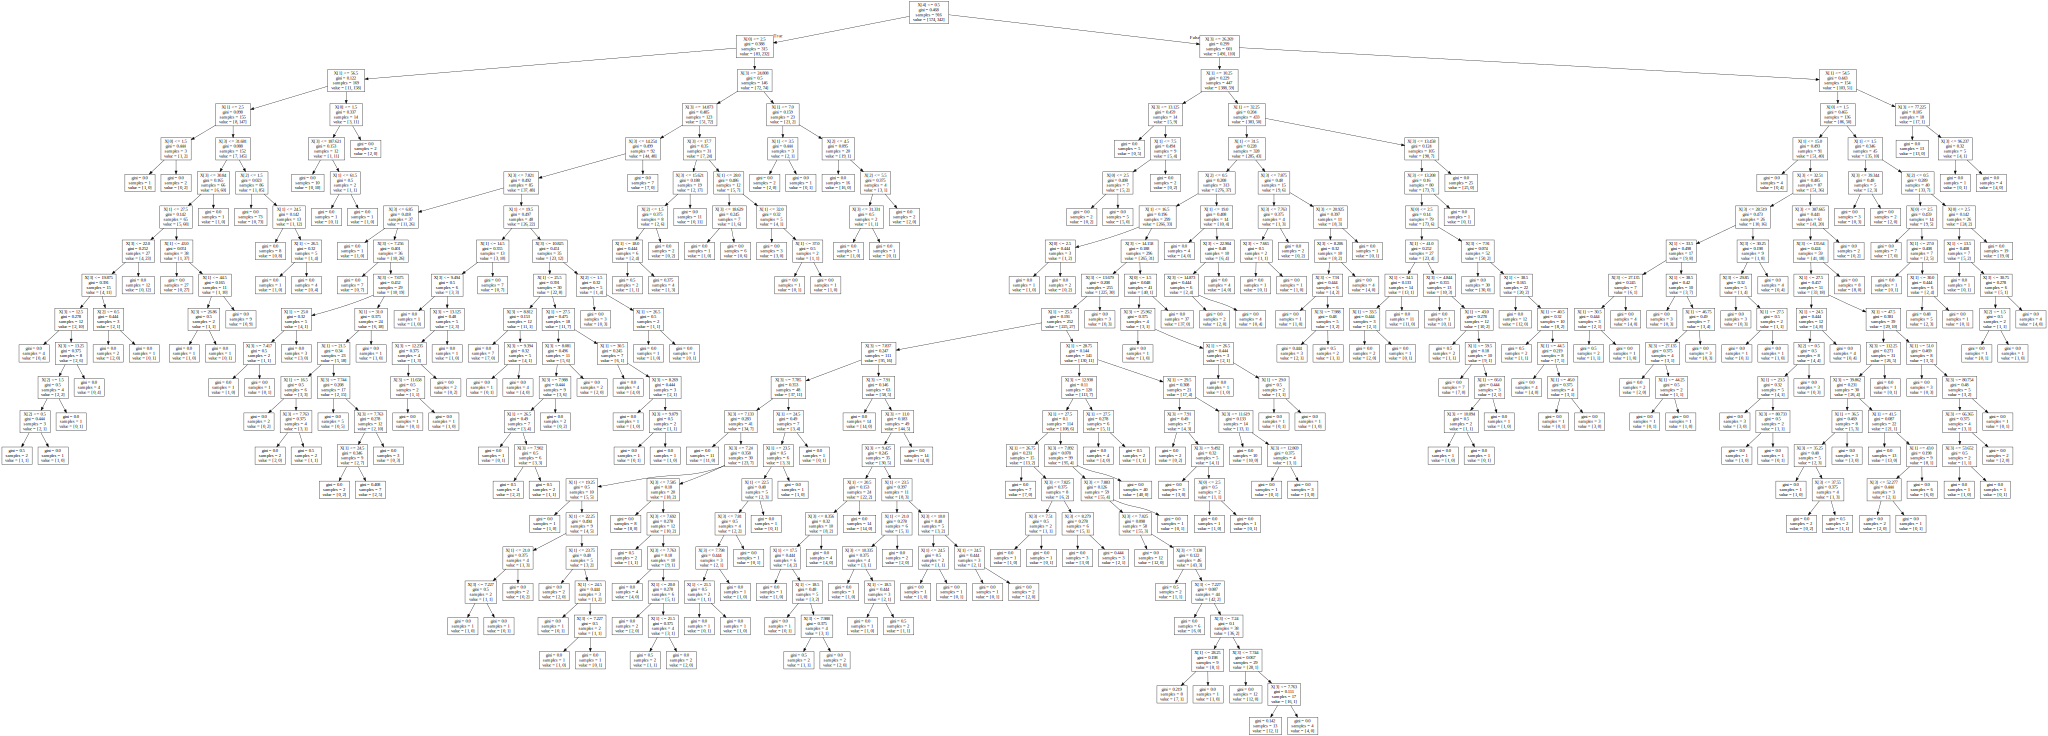

In [63]:
# Feed the visualisation with the decision tree data (scroll to the right and bottom, as the picture is large)
graph = graphviz.Source(dot_data) 
graph

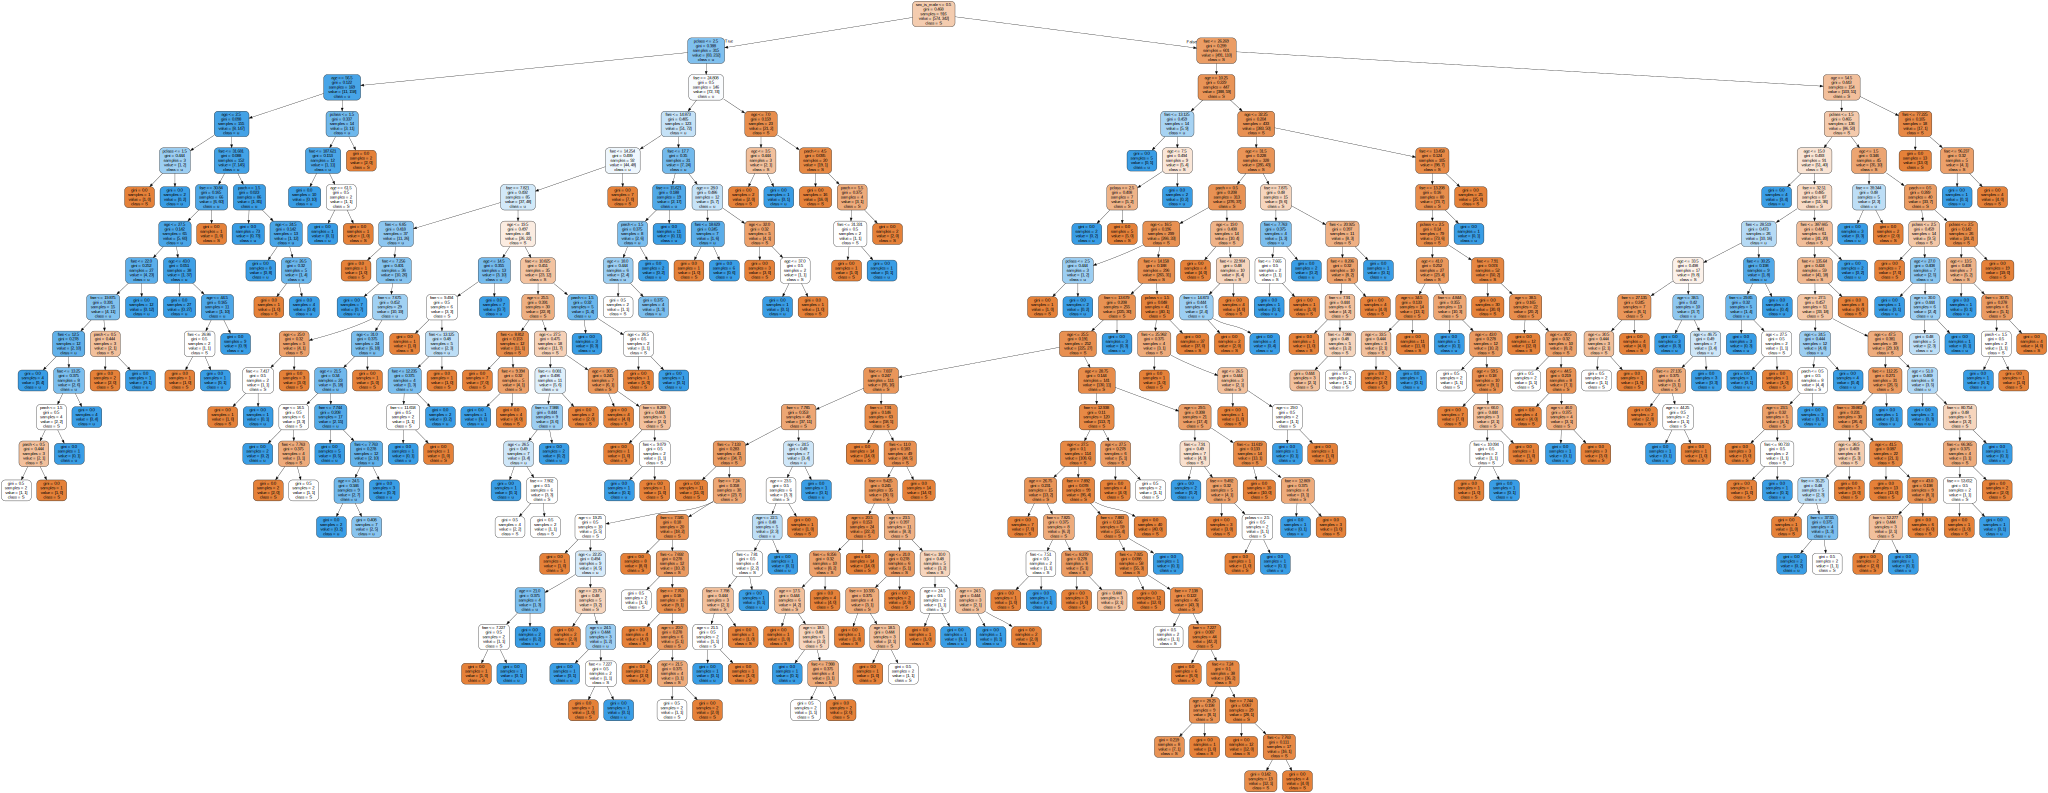

In [64]:
# We can also change a bit the visualisation (scroll to the right and bottom, as the picture is large)
dot_file = tree.export_graphviz(tr, out_file=None, feature_names=X.columns, 
                                class_names='Survived', filled=True,rounded=True)  
graph = graphviz.Source(dot_file)  
graph

In [65]:
# We want to have a look at the predictions output
tr_predictions

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [67]:
# We want to "print" the decision tree but less 'graphically' with simple text
from sklearn.tree.export import export_text
print(export_text(tr))

|--- feature_4 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 56.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_3 <= 31.68
|   |   |   |   |   |--- feature_3 <= 30.84
|   |   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |   |--- feature_3 <= 22.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 19.88
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 12.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_3 >  12.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 13.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  13.25
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |

In [69]:
# We feed the decision tree with Jack and Rose data
will_they_live_tr = lr.predict(people)

In [70]:
print("(Decision Tree) Results for Jack:")
if will_they_live[0] == 0 : print("Jack just died again!")
else: print("Awesome, Jack did swim and survived!")             
print("(Decision Tree) Results for Rose:")
if will_they_live[1] == 0 : print("Omg Rose did drown too!")
else : print("No worries, Rose still alive and well!")

(Decision Tree) Results for Jack:
Jack just died again!
(Decision Tree) Results for Rose:
No worries, Rose still alive and well!


At 11:40 p.m. (ship's time) on 14 April, lookout Frederick Fleet spotted an iceberg immediately ahead of Titanic and alerted the bridge. First Officer William Murdoch ordered the ship to be steered around the obstacle and the engines to be stopped, but it was too late; the starboard side of Titanic struck the iceberg, creating a series of holes below the waterline. It soon became clear that the ship was doomed, as she could not survive more than four compartments being flooded. Titanic began sinking bow-first, with water spilling from compartment to compartment as her angle in the water became steeper. Third-class passengers were largely left to fend for themselves, causing many of them to become trapped below decks as the ship filled with water. The "women and children first" protocol was generally followed when loading the lifeboats, and most of the male passengers and crew were left aboard.

It looks like both logistic regression and decision tree methods can't save our Jack! The vertical stern of the ship plunges down shrieking and groaning, with bodies falling hundreds of feet down toward churning water. Some fans will never let go of the possibility that there was room enough for both Jack and Rose on that door at the end of Titanic. Director James Cameron has an explanation for them that doesn’t involve physics, but rather art. “Had he lived, the ending of the film would have been meaningless,” he said in a recent Vanity Fair interview. “The film is about death and separation; he had to die.”

Unless...

[Click this link for an alternate Titanic ending](https://github.com/antoinedme/titanic-dataset-ml/blob/master/README.md#final-remarks)


In [ ]:
**Want to read the frienly article based on this code** (with pictures!):
https://github.com/antoinedme/titanic-dataset-ml


Author: *Antoine de Marassé* https://www.linkedin.com/in/hiantoine/

Based on: Microsoft Azure (data science masterclass), Kaggle, Pandas, Sci-kit Learn and Seaborn